In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [334]:
customers_df = pd.read_csv(r"C:\Users\daxia\Desktop\AI digital\Python libraries exam\customers (2).csv")
items_df = pd.read_csv(r"C:\Users\daxia\Desktop\AI digital\Python libraries exam\Items (2).csv")
order_item_df = pd.read_csv(r"C:\Users\daxia\Desktop\AI digital\Python libraries exam\order_item (2).csv")
orders_df = pd.read_csv(r"C:\Users\daxia\Desktop\AI digital\Python libraries exam\orders (2).csv")

In [335]:
customers_df_copy = customers_df.copy()
items_df_copy = items_df.copy()
order_item_df_copy = order_item_df.copy()
orders_df_copy = orders_df.copy()

In [336]:
##Data Preperation:
##1.Handle duplicate data in item dataset

In [337]:
duplicated_items = items_df_copy[items_df_copy.duplicated(["item_name","item_brand"],keep = False)]

In [338]:
duplicated_items

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability


In [339]:
##No duplicates with same name and item brand exist

In [340]:
duplicated_items = items_df_copy[items_df_copy.duplicated(["item_name"],keep = False)]

In [341]:
duplicated_items.sort_values("item_name")

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
47,48,Camera,Photography Equipment,2039.08,471.0,Panasonic,True
6,7,Camera,Photography Equipment,2366.72,458.0,Microsoft,True
2,3,Desktop,Computers and Accessories,1121.84,334.0,HP,True
43,44,Desktop,Computers and Accessories,723.59,1119.0,JBL,True
7,8,Headphone,NaN,3117.19,599.0,NaN,True
48,49,Headphone,Audio Equipment,1317.56,NaN,Sony,False
1,2,Laptop,Computers and Accessories,1851.32,493.0,HP,True
42,43,Laptop,Computers and Accessories,4153.61,1018.0,Dell,True
5,6,Printer,Printers and Office Equipment,4175.99,971.0,Sony,True
46,47,Printer,Printers and Office Equipment,3704.16,239.0,Toshiba,True


In [342]:
items_df_copy.drop(7, inplace=True)

In [343]:
order_item_df_copy["item_id"] = order_item_df_copy["item_id"].replace({8:49})

In [344]:
##2.Handle duplicate data in customer dataset

In [345]:
customers_df_copy[customers_df_copy.duplicated("email")]

,id,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email


In [346]:
##No duplicates with same email

In [347]:
##3.Handle missing data in all datasets:

In [348]:
missing_data = items_df_copy.isna().sum()
all_rows = items_df_copy.isna().count()
missing_data_percentage = missing_data*100/all_rows
missing_data_percentage

id                    0.000000
item_name             0.000000
item_category        14.285714
item_price            0.000000
stock_quantity       10.204082
item_brand            4.081633
item_availability     0.000000
dtype: float64

In [349]:
items_df_copy["item_category"] = items_df_copy["item_category"].fillna("Unknown")

In [350]:
items_df_copy["stock_quantity"] = items_df_copy["stock_quantity"].fillna(-1)

In [351]:
items_df_copy.dropna(subset="item_brand", inplace=True)

In [352]:
order_item_df_copy = order_item_df_copy[order_item_df_copy["item_id"].isin(items_df_copy["id"])]

In [353]:
orders_df_copy = orders_df_copy[orders_df_copy["order_id"].isin(order_item_df_copy["order_id"])]

In [354]:
order_item_df_copy = order_item_df_copy[order_item_df_copy["order_id"].isin(orders_df_copy["order_id"])]

In [355]:
missing_data = customers_df_copy.isna().sum()
all_rows = customers_df_copy.isna().count()
missing_data_percentage = missing_data*100/all_rows
missing_data_percentage

id               0.0
first_name       0.0
last_name        0.0
gender          10.6
age              5.0
nationallity     0.0
joining_date    12.2
phone_number     0.0
email            0.0
dtype: float64

In [356]:
customers_df_copy["gender"] = customers_df_copy["gender"].fillna("Unknown")

In [357]:
customers_df_copy["joining_date"] = customers_df_copy["joining_date"].fillna("1900-01-01")

In [358]:
customers_df_copy["age"] = customers_df_copy["age"].fillna(round(customers_df_copy["age"].mean()))

In [359]:
missing_data = orders_df_copy.isna().sum()
all_rows = orders_df_copy.isna().count()
missing_data_percentage = missing_data*100/all_rows
missing_data_percentage

order_id             0.000000
customer_id          6.928406
delivery_address     0.000000
delivery_days       12.009238
order_date           0.000000
payment_method       0.000000
order_source         0.000000
dtype: float64

In [360]:
orders_df_copy.dropna(subset="customer_id", inplace=True)

In [361]:
orders_df_copy["delivery_days"] = orders_df_copy["delivery_days"].fillna(round(orders_df_copy["delivery_days"].mean()))

In [362]:
missing_data = order_item_df_copy.isna().sum()
all_rows = order_item_df_copy.isna().count()
missing_data_percentage = missing_data*100/all_rows
missing_data_percentage

Unnamed: 0    0.0
id            0.0
order_id      0.0
item_id       0.0
quantity      0.0
dtype: float64

In [363]:
##Data analysis
##1.Explore the customer.csv dataset
##a.

In [364]:
customers_by_gender = customers_df_copy.groupby("gender")["gender"].count()

In [365]:
customers_by_gender = customers_by_gender.reset_index(name="count")

In [366]:
customers_by_gender

,gender,count
0,Agender,13
1,Bigender,5
2,Female,203
3,Genderfluid,12
4,Genderqueer,5
5,Male,196
6,Non-binary,7
7,Polygender,6
8,Unknown,53


Text(0, 0.5, 'Customers count')

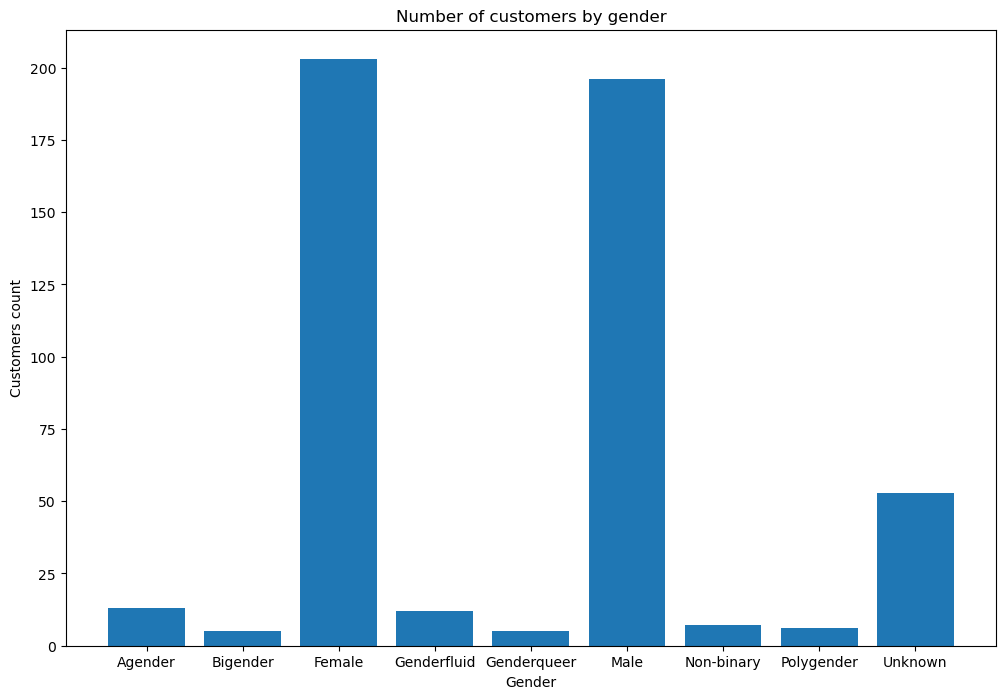

In [367]:
plt.figure(figsize=(12,8))
plt.bar(customers_by_gender["gender"],customers_by_gender["count"])
plt.title("Number of customers by gender")
plt.xlabel("Gender")
plt.ylabel("Customers count")

In [368]:
##b.

Text(0, 0.5, 'Count')

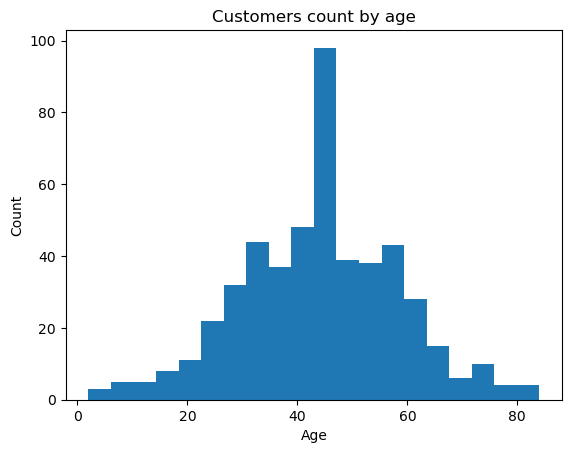

In [369]:
plt.hist(customers_df_copy["age"], bins=20)
plt.title("Customers count by age")
plt.xlabel("Age")
plt.ylabel("Count")

In [370]:
##c.

In [371]:
customers_known_join_date = customers_df_copy[customers_df_copy["joining_date"] != "1900-01-01"]

In [372]:
customers_known_join_date["joining_date"] = pd.to_datetime(customers_known_join_date["joining_date"])

C:\Users\daxia\AppData\Local\Temp\ipykernel_75244\2994969090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_known_join_date["joining_date"] = pd.to_datetime(customers_known_join_date["joining_date"])


In [373]:
customers_known_join_date = customers_known_join_date.set_index("joining_date")

In [374]:
customers_joined_by_year = customers_known_join_date.resample(rule="YE")["id"].count()

In [375]:
customers_joined_by_year = customers_joined_by_year.reset_index(name = "customers")

In [376]:
customers_joined_by_year

,joining_date,customers
0,2020-12-31,138
1,2021-12-31,138
2,2022-12-31,163


In [377]:
##The year with most joining customers is the year 2022

In [378]:
##d.

In [379]:
customers_joined_by_day = customers_known_join_date.resample(rule="ME")["id"].count()

In [380]:
customers_joined_by_day = customers_joined_by_day.reset_index(name = "customers")

Text(0, 0.5, 'Amount of customers joining')

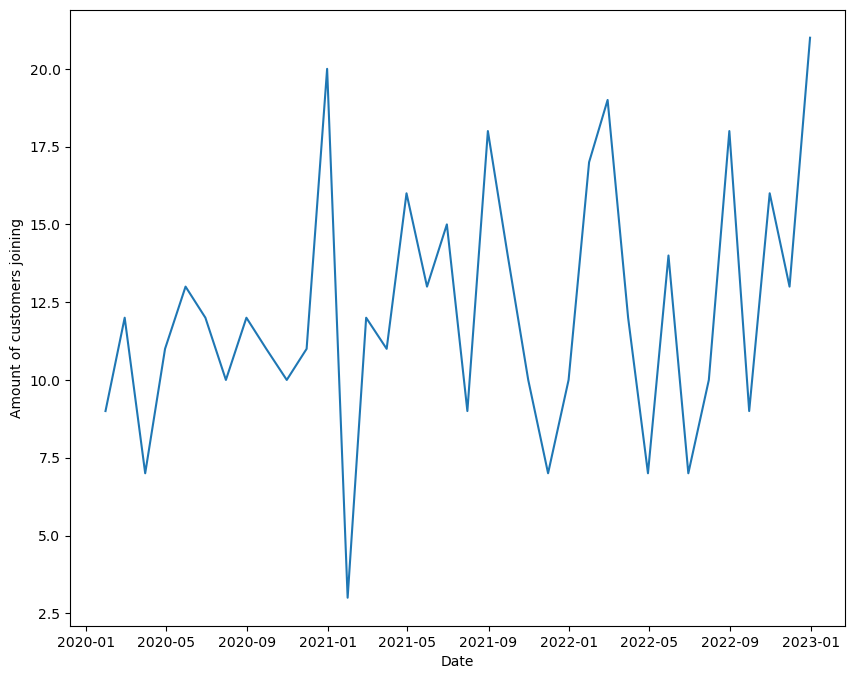

In [381]:
plt.figure(figsize=(10,8))
plt.plot(customers_joined_by_day["joining_date"],customers_joined_by_day["customers"])
plt.xlabel("Date")
plt.ylabel("Amount of customers joining")

In [382]:
##There doesn't seem to be a consistent increase or decrease in customers joining over the timeframe.

In [383]:
##e.

In [384]:
customers_joined_by_month = customers_joined_by_day

In [385]:
customers_joined_by_month["joining_date"] = customers_joined_by_day["joining_date"].dt.month

In [386]:
customers_joined_by_month = customers_joined_by_month.groupby("joining_date")["customers"].sum()

In [387]:
customers_joined_by_month

joining_date
1     29
2     43
3     30
4     34
5     40
6     34
7     29
8     48
9     34
10    36
11    31
12    51
Name: customers, dtype: int64

In [388]:
customers_joined_by_month = customers_joined_by_month.reset_index()

Text(0, 0.5, 'Customers')

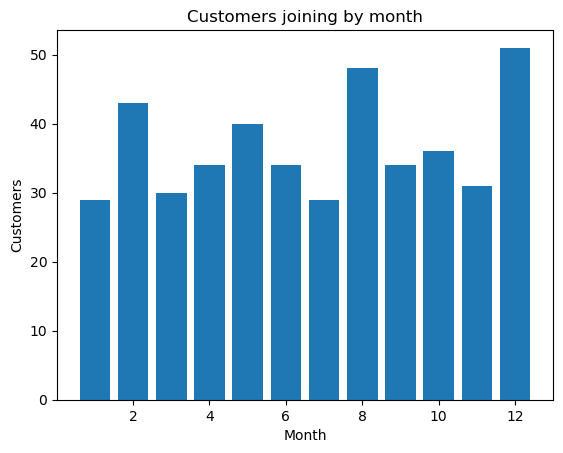

In [389]:
plt.bar(customers_joined_by_month["joining_date"],customers_joined_by_month["customers"])
plt.title("Customers joining by month")
plt.xlabel("Month")
plt.ylabel("Customers")

In [390]:
##According to the chart, there is a slight increase in customers joining in the months of: February, March, August and December.

In [391]:
##2.Explore the items.csv dataset

In [392]:
##a.

In [393]:
items_by_category = items_df_copy.groupby("item_category").size()

In [394]:
items_by_category = items_by_category.reset_index(name = "count")

In [395]:
items_by_category

,item_category,count
0,Audio Equipment,3
1,Cables,1
2,Computers and Accessories,8
3,Gaming Equipment,2
4,Mobile Devices and Accessories,7
5,Network Equipment,1
6,Photography Equipment,6
7,Printers and Office Equipment,6
8,Storage Devices,1
9,Televisions and Displays,4


([<matplotlib.patches.Wedge at 0x1eaefe811d0>,
 [Text(1.0779578754290626, 0.21910458416122053, 'Audio Equipment'),
  Text(0.9817707139300372, 0.4961111420531745, 'Cables'),
  Text(0.528639889763134, 0.9646449434642892, 'Computers and Accessories'),
  Text(-0.18296238101407203, 1.0846772640438544, 'Gaming Equipment'),
  Text(-0.7647117379628761, 0.7907059869646857, 'Mobile Devices and Accessories'),
  Text(-1.0609161408655394, 0.2906147657139448, 'Network Equipment'),
  Text(-1.0779578562743268, -0.2191046783992939, 'Photography Equipment'),
  Text(-0.5918907261277618, -0.9271814106872242, 'Printers and Office Equipment'),
  Text(-0.11010524801270881, -1.0944755978824106, 'Storage Devices'),
  Text(0.2550020086103809, -1.0700345674811966, 'Televisions and Displays'),
  Text(0.9068855274257894, -0.622542079016068, 'Unknown'),
  Text(1.0975435676412324, -0.07347187985451241, 'Video Players and Recorders')])

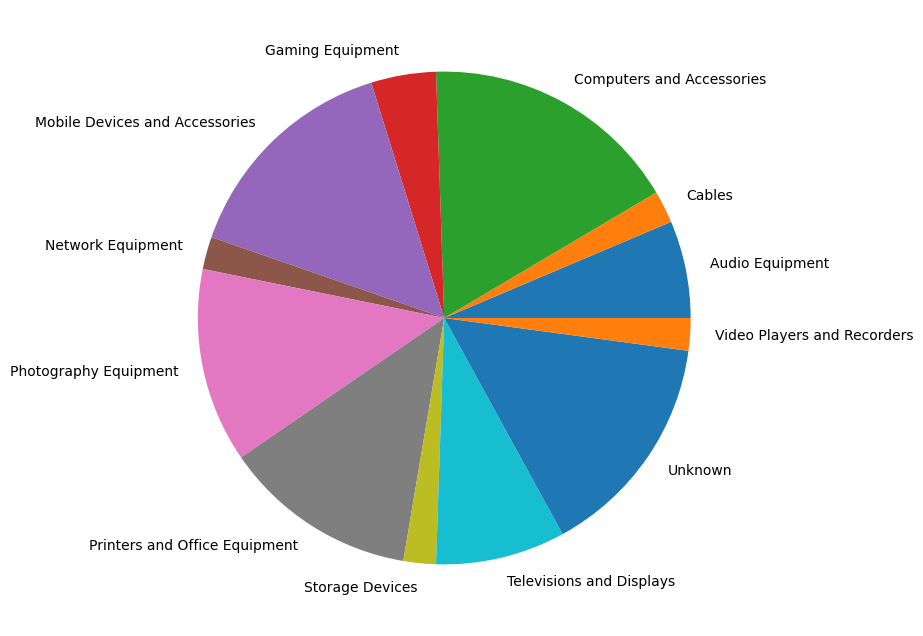

In [396]:
plt.figure(figsize=(10,8))
plt.pie(items_by_category["count"], labels=items_by_category["item_category"])

In [397]:
##b.

In [398]:
items_known_stock = items_df_copy[items_df_copy["stock_quantity"]!=-1]

In [399]:
max_stock_item = items_known_stock[items_known_stock["stock_quantity"]==items_known_stock["stock_quantity"].max()]

In [400]:
min_stock_item = items_known_stock[items_known_stock["stock_quantity"]==items_known_stock["stock_quantity"].min()]

In [401]:
min_stock_item

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
34,35,Wi-Fi Router,Network Equipment,3812.53,14.0,Microsoft,True


In [402]:
min_max_df = pd.concat([max_stock_item, min_stock_item])

In [403]:
min_max_df

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
40,41,VR Headset,Unknown,1905.01,1367.0,JBL,True
34,35,Wi-Fi Router,Network Equipment,3812.53,14.0,Microsoft,True


In [404]:
##c.

In [405]:
mean_stock = round(items_known_stock["stock_quantity"].mean())

In [406]:
print(f"The mean quantity of stock of all items is {mean_stock}")

The mean quantity of stock of all items is 750


In [407]:
##3.Explore the orders.csv dataset

In [408]:
##a.

In [409]:
customers_orders = orders_df_copy.groupby("customer_id").size()

In [410]:
customers_orders = customers_orders.reset_index(name="orders")

In [411]:
customers_orders_count = customers_orders.groupby("orders").size()

In [412]:
customers_orders_count = customers_orders_count.reset_index(name="customers_count")

In [413]:
customers_orders_count

,orders,customers_count
0,1,167
1,2,74
2,3,22
3,4,3
4,5,2


Text(0, 0.5, 'Customers count')

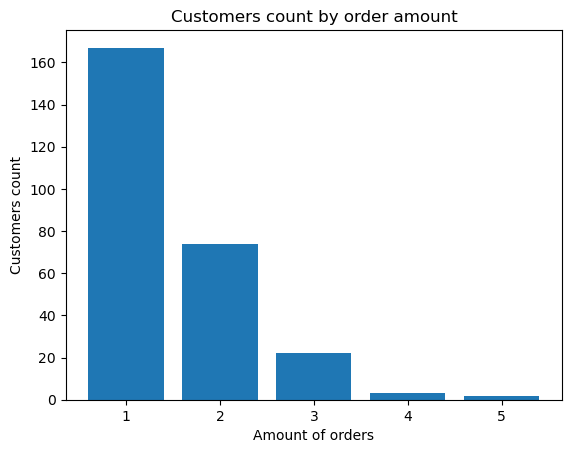

In [414]:
plt.bar(customers_orders_count["orders"],customers_orders_count["customers_count"])
plt.title("Customers count by order amount")
plt.xlabel("Amount of orders")
plt.ylabel("Customers count")


In [415]:
customers_names_orders = customers_df_copy.merge(orders_df_copy, left_on="id", right_on="customer_id", how="inner")

In [416]:
customers_orders_amount = customers_names_orders.groupby("id").size()

In [417]:
customers_orders_amount = customers_orders_amount.reset_index(name="orders")

In [418]:
customers_orders_amount = customers_orders_amount.sort_values(by="orders",ascending=False)

In [419]:
top_5_customers = customers_orders_amount.head(5)

In [420]:
top_5_customers = top_5_customers.merge(customers_df_copy, on="id")

In [421]:
top_5_customers

,id,orders,first_name,last_name,gender,age,nationallity,joining_date,phone_number,email
0,59,5,Merill,Lacroutz,Male,40.0,Isreal,2022-04-11,988-997-5910,mlacroutz1m@ft.com
1,138,5,Ellary,Ledner,Unknown,63.0,Peru,1900-01-01,343-500-4046,eledner3t@latimes.com
2,63,4,Dorine,Cauldfield,Female,44.0,Italy,2022-02-01,719-649-1327,dcauldfield1q@indiegogo.com
3,286,4,Rolfe,Gravenell,Male,27.0,Chile,2020-08-04,597-503-5502,rgravenell7x@hexun.com
4,204,4,Sharon,Wilby,Female,26.0,Peru,1900-01-01,235-951-1329,swilby5n@dailymail.co.uk


In [422]:
top_5_customers = top_5_customers.drop(["gender","age","nationallity","phone_number","email"],axis=1)

In [423]:
top_5_customers

,id,orders,first_name,last_name,joining_date
0,59,5,Merill,Lacroutz,2022-04-11
1,138,5,Ellary,Ledner,1900-01-01
2,63,4,Dorine,Cauldfield,2022-02-01
3,286,4,Rolfe,Gravenell,2020-08-04
4,204,4,Sharon,Wilby,1900-01-01


In [424]:
##c.

In [425]:
payment_method_customers = orders_df_copy.groupby(["payment_method","customer_id"]).size()

In [426]:
payment_method_customers

payment_method  customer_id
CASH            4.0            1
                5.0            1
                9.0            2
                11.0           1
                18.0           1
                              ..
GIFT_CARD       486.0          1
                491.0          2
                492.0          1
                494.0          1
                497.0          1
Length: 369, dtype: int64

In [427]:
payment_method_customers = payment_method_customers.reset_index(name="orders")

In [428]:
payment_method_customers = payment_method_customers.groupby("payment_method").size()

In [429]:
payment_method_customers = payment_method_customers.reset_index(name="customers")

In [430]:
payment_method_customers

,payment_method,customers
0,CASH,98
1,CHECK,97
2,CREDIT_CARD,88
3,GIFT_CARD,86


([<matplotlib.patches.Wedge at 0x1eaf0648e10>,
 [Text(0.7388232414586936, 0.8149479847698682, 'CASH'),
  Text(-0.8776529492057926, 0.6631178633926058, 'CHECK'),
  Text(-0.6593760058822301, -0.8804676500966958, 'CREDIT_CARD'),
  Text(0.8180855245039272, -0.735347587605436, 'GIFT_CARD')])

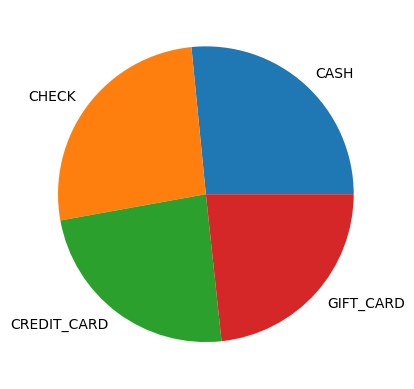

In [431]:
plt.pie(payment_method_customers["customers"], labels=payment_method_customers["payment_method"])

In [432]:
##4.Use all datasets and answer the following questions

In [433]:
##a.

In [434]:
orders_with_sum = order_item_df_copy.merge(items_df_copy, left_on="item_id", right_on="id", how="inner")

In [435]:
orders_with_sum["order_total"] = orders_with_sum["quantity"]*orders_with_sum["item_price"]

In [436]:
orders_with_sum = orders_with_sum.groupby("order_id")["order_total"].sum()

In [437]:
orders_with_sum = orders_with_sum.reset_index(name = "order_total")

In [438]:
orders_with_sum

,order_id,order_total
0,1,8554.20
1,2,10148.58
2,3,6843.36
3,4,965.20
4,5,63944.94
...,...,...
428,593,2301.74
429,594,54186.82
430,596,5270.24
431,597,1710.84


In [439]:
orders_df_copy= orders_df_copy.merge(orders_with_sum, on="order_id", how="inner")

In [440]:
orders_df_copy

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,order_total
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE,8554.20
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE,10148.58
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE,6843.36
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE,965.20
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE,63944.94
...,...,...,...,...,...,...,...,...
398,593,292.0,90001 Kedzie Point,4.0,2023-09-16,CREDIT_CARD,WEBSITE,2301.74
399,594,480.0,242 Brown Avenue,6.0,2023-02-18,GIFT_CARD,STORE,54186.82
400,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE,5270.24
401,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE,1710.84


In [441]:
##b.

In [442]:
max_order_total = round(orders_df_copy["order_total"].max())

In [443]:
min_order_total = round(orders_df_copy["order_total"].min())

In [444]:
mean_order_total = round(orders_df_copy["order_total"].mean())

In [445]:
print(f"The max order total is {max_order_total}, the min order total is {min_order_total} and the mean order total is {mean_order_total}")

The max order total is 69582, the min order total is 242 and the mean order total is 14089


In [446]:
##c.

In [447]:
order_delivery_time = orders_df_copy.merge(order_item_df_copy, on="order_id", how="inner")

In [448]:
order_delivery_time_no_duplicates = order_delivery_time.groupby(["order_id","delivery_days"])["quantity"].sum()

In [449]:
order_delivery_time_no_duplicates = order_delivery_time_no_duplicates.reset_index(name="quantity")

Text(0, 0.5, 'Items in order')

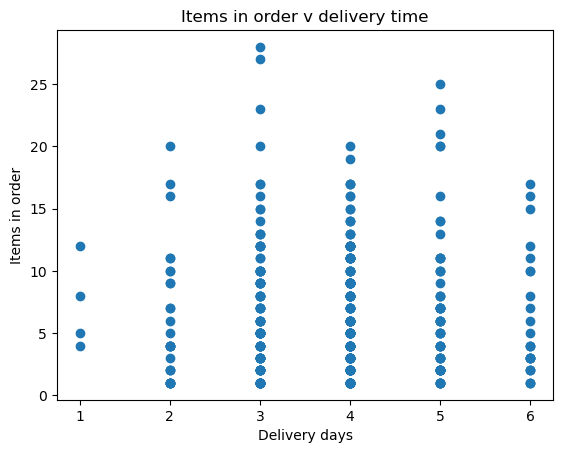

In [450]:
plt.scatter(order_delivery_time_no_duplicates["delivery_days"],order_delivery_time_no_duplicates["quantity"])
plt.title("Items in order v delivery time")
plt.xlabel("Delivery days")
plt.ylabel("Items in order")

In [451]:
print("according to the scatter chart, there is no clear correlation between the number of items in an order and the amount of time it takes to deliver")

according to the scatter chart, there is no clear correlation between the number of items in an order and the amount of time it takes to deliver


In [452]:
##d.

In [453]:
total_customers = customers_df_copy["id"].count()

In [454]:
customers_who_ordered = customers_df_copy[customers_df_copy["id"].isin(orders_df_copy["customer_id"])]["id"].count()

In [455]:
customers_never_ordered = total_customers - customers_who_ordered

In [456]:
print(f"The amount of customers who never placed an order is {customers_never_ordered}")

The amount of customers who never placed an order is 232


In [457]:
##e.

In [458]:
items_amount_ordered = order_item_df_copy.groupby("item_id")["quantity"].sum()

In [459]:
items_amount_ordered = items_amount_ordered.reset_index()

In [460]:
items_amount_ordered = items_amount_ordered.sort_values(by="quantity")

In [461]:
items_amount_ordered = items_amount_ordered.head(5)

In [462]:
items_amount_ordered = items_amount_ordered.merge(items_df_copy, left_on="item_id",right_on="id",how="inner")

In [463]:
items_amount_ordered.drop(["id","item_category","item_price","stock_quantity","item_brand","item_availability"], axis=1, inplace=True)

In [464]:
items_amount_ordered

,item_id,quantity,item_name
0,29.0,25,Webcam
1,33.0,27,Surge Protector
2,21.0,33,External Hard Drive
3,28.0,34,CCTV Camera
4,6.0,37,Printer


In [465]:
##Bonus

In [466]:
##1

In [467]:
orders_df_copy

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,order_total
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE,8554.20
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE,10148.58
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE,6843.36
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE,965.20
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE,63944.94
...,...,...,...,...,...,...,...,...
398,593,292.0,90001 Kedzie Point,4.0,2023-09-16,CREDIT_CARD,WEBSITE,2301.74
399,594,480.0,242 Brown Avenue,6.0,2023-02-18,GIFT_CARD,STORE,54186.82
400,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE,5270.24
401,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE,1710.84


In [468]:
orders_df_copy["order_date"] = pd.to_datetime(orders_df_copy["order_date"])

In [469]:
orders_by_source = orders_df_copy.groupby(["order_date","order_source"]).size()

In [470]:
orders_by_source = orders_by_source.reset_index(name = "orders")

In [471]:
web_orders = orders_by_source[orders_by_source["order_source"]=="WEBSITE"]

In [472]:
web_orders

,order_date,order_source,orders
1,2023-01-02,WEBSITE,4
3,2023-01-03,WEBSITE,1
4,2023-01-04,WEBSITE,1
5,2023-01-05,WEBSITE,2
7,2023-01-06,WEBSITE,1
...,...,...,...
303,2023-12-25,WEBSITE,1
305,2023-12-26,WEBSITE,1
306,2023-12-27,WEBSITE,2
307,2023-12-28,WEBSITE,1


In [473]:
store_orders = orders_by_source[orders_by_source["order_source"]=="STORE"]

In [474]:
store_orders

,order_date,order_source,orders
0,2023-01-01,STORE,1
2,2023-01-03,STORE,1
6,2023-01-06,STORE,1
9,2023-01-09,STORE,1
10,2023-01-10,STORE,2
...,...,...,...
293,2023-12-16,STORE,2
296,2023-12-20,STORE,1
298,2023-12-21,STORE,1
301,2023-12-23,STORE,1


In [475]:
web_orders.set_index("order_date", inplace=True)

In [476]:
store_orders.set_index("order_date", inplace=True)

In [477]:
web_orders_monthly = web_orders.resample(rule="ME")["orders"].sum()

In [478]:
store_orders_monthly = store_orders.resample(rule="ME")["orders"].sum()

In [479]:
web_orders_monthly = web_orders_monthly.reset_index(name = "orders")

In [480]:
store_orders_monthly = store_orders_monthly.reset_index(name = "orders")

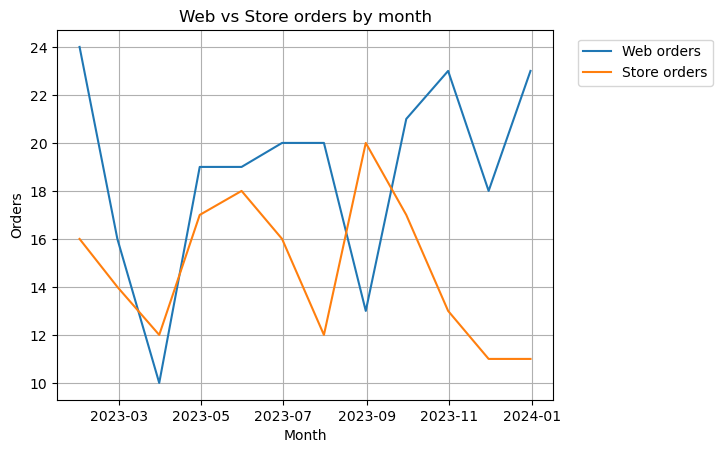

In [481]:
plt.plot(web_orders_monthly["order_date"], web_orders_monthly["orders"])
plt.plot(store_orders_monthly["order_date"], store_orders_monthly["orders"])
plt.title("Web vs Store orders by month")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.legend(["Web orders","Store orders"], loc=(1.05,0.85))
plt.grid()

In [482]:
print("It appears the campain wasnt very effective at the start but after a couple of months it took speed and the web orders started rising while the store orders plummeted.")

It appears the campain wasnt very effective at the start but after a couple of months it took speed and the web orders started rising while the store orders plummeted.


In [483]:
#2.

In [484]:
orders_df_copy

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,order_total
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE,8554.20
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE,10148.58
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE,6843.36
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE,965.20
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE,63944.94
...,...,...,...,...,...,...,...,...
398,593,292.0,90001 Kedzie Point,4.0,2023-09-16,CREDIT_CARD,WEBSITE,2301.74
399,594,480.0,242 Brown Avenue,6.0,2023-02-18,GIFT_CARD,STORE,54186.82
400,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE,5270.24
401,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE,1710.84


In [485]:
gift_card_orders = orders_df_copy[orders_df_copy["payment_method"] == "GIFT_CARD"]

In [486]:
non_gift_card_orders = orders_df_copy[orders_df_copy["payment_method"] != "GIFT_CARD"]

In [487]:
gift_card_orders.set_index("order_date",inplace=True)

In [488]:
non_gift_card_orders.set_index("order_date",inplace=True)

In [489]:
gift_card_orders = gift_card_orders.resample(rule="ME").size()

In [490]:
gift_card_orders = gift_card_orders.reset_index(name = "orders")

In [491]:
non_gift_card_orders = non_gift_card_orders.resample(rule="ME").size()

In [492]:
non_gift_card_orders = non_gift_card_orders.reset_index(name = "orders")

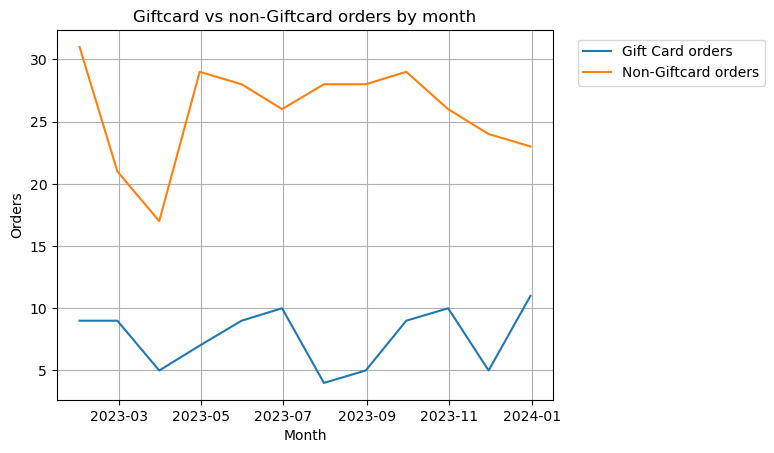

In [493]:
plt.plot(gift_card_orders["order_date"], gift_card_orders["orders"])
plt.plot(non_gift_card_orders["order_date"], non_gift_card_orders["orders"])
plt.title("Giftcard vs non-Giftcard orders by month")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.legend(["Gift Card orders","Non-Giftcard orders"], loc=(1.05,0.85))
plt.grid()

In [494]:
print("It appears that the campain did not end up increasing sales by a large margin.")

It appears that the campain did not end up increasing sales by a large margin.
